In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [43]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [5]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer, how = 'notnormal')
all_features = features.get_total_transactions(all_features, transaction_categories)

In [15]:
all_features = features.get_categorical_features(
    all_features, transaction_categories, acct
)

In [16]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [77]:
all_features = pd.read_csv("../../data_q2/features.csv")
na_consumers = consumer[consumer["DQ_TARGET"].isna()]["prism_consumer_id"].astype(int)
all_features = all_features[~all_features["prism_consumer_id"].isin(na_consumers)]
all_features = all_features.set_index('prism_consumer_id')
all_features = all_features[all_features['transactions'] > 1]


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 6.6s | Predicting Time: 0.000026s
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.49      0.13      0.21       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



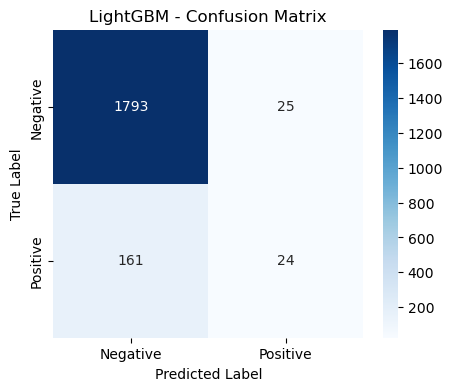


Balanced RF Results
ROC-AUC: 0.807 | Accuracy: 0.907
Training Time: 41.2s | Predicting Time: 0.000065s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.49      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.71      0.57      0.59      2003
weighted avg       0.88      0.91      0.88      2003



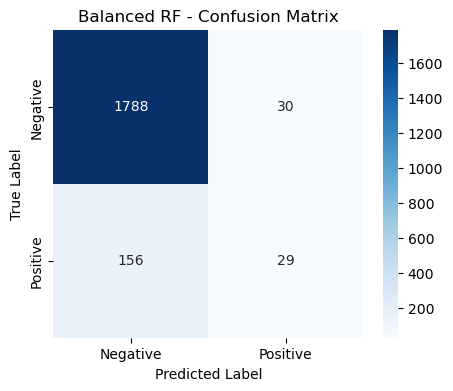


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.903
Training Time: 6.8s | Predicting Time: 0.000017s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



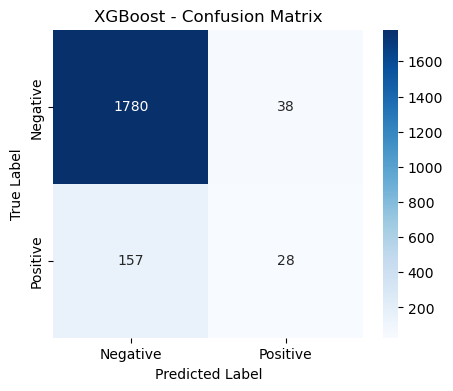


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.899
Training Time: 8.7s | Predicting Time: 0.000010s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.40      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



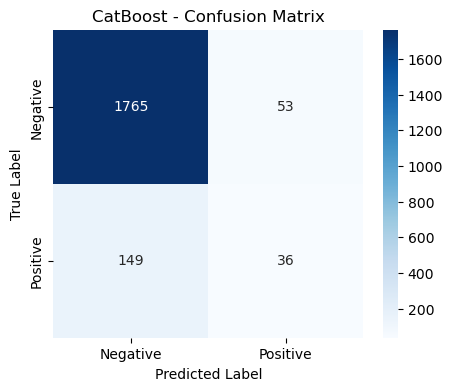


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.826 | Accuracy: 0.909
Precision: 0.882 | Recall: 0.909 | F1-score: 0.885
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.52      0.15      0.23       185

    accuracy                           0.91      2003
   macro avg       0.72      0.57      0.59      2003
weighted avg       0.88      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.825912  0.908637   0.882416 0.908637  0.885187    0.001104      0.000002
         LightGBM 0.819511  0.907139   0.878092 0.907139  0.881828    6.643562      0.000026
         CatBoost 0.815184  0.899151   0.874341 0.899151  0.882781    8.744367      0.000010
          XGBoost 0.809794  0.902646   0.8732

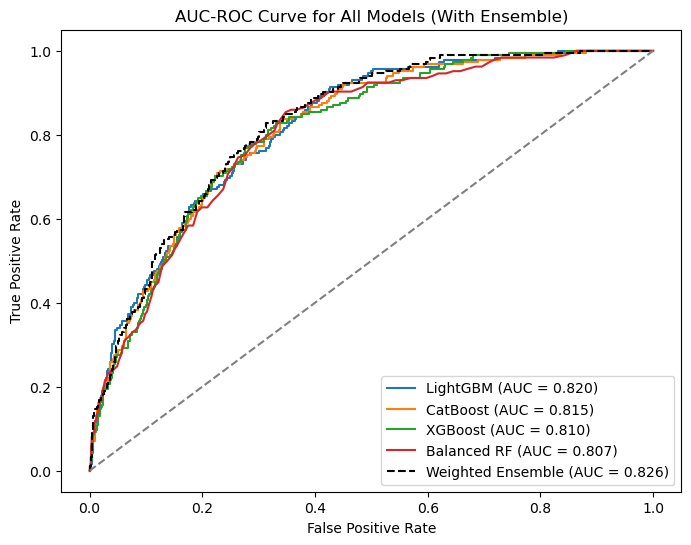

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 4  Weighted Ensemble  0.825912  0.908637    0.001104      0.000002   0.882416   
 0           LightGBM  0.819511  0.907139    6.643562      0.000026   0.878092   
 3           CatBoost  0.815184  0.899151    8.744367      0.000010   0.874341   
 2            XGBoost  0.809794  0.902646    6.778178      0.000017   0.873255   
 1        Balanced RF  0.807366  0.907139   41.201367      0.000065   0.880201   
 
      recall  f1-score  support  
 4  0.908637  0.885187      NaN  
 0  0.907139  0.881828   2003.0  
 3  0.899151  0.882781   2003.0  
 2  0.902646  0.881111   2003.0  
 1  0.907139  0.884718   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'Balanced RF': BalancedRandomForestClassifier(n_estimators=200, random_state=42),
  'XGBoost': XGBClassifier(base_score=None

In [98]:
# test with credit score
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)

In [ ]:
# test without credit score
classification_features = (
    all_features.drop(columns=["credit_score", "evaluation_date", "DQ_TARGET"])
).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)


In [101]:
# find best features including credit score
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features_credit = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 200)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.057994    -0.279325
                           balance    0.038314    -0.038746
              account_type_SAVINGS    0.029798    -0.110443
                ACCOUNT_FEES_count    0.025773     0.024066
               ACCOUNT_FEES_median    0.022467     0.001439
                  OVERDRAFT_median    0.018861    -0.000057
                  ACCOUNT_FEES_std    0.016586     0.011815
                 SELF_TRANSFER_iqr    0.014890    -0.039885
                   OVERDRAFT_count    0.013037     0.075768
                     OVERDRAFT_std    0.012724     0.014835
                       BNPL_median    0.011085     0.012941
                        LOAN_count    0.010352     0.051421
                          LOAN_std    0.010018    -0.011072
                 AUTOMOTIVE_median    0.009835    -0.011286
                      transactions    0.009489    -0.028498


In [ ]:
# find best features without credit score
classification_features = (
    all_features.drop(columns=["credit_score", "evaluation_date", "DQ_TARGET"])
).columns
best_features_non_credit = classify.get_best_features(
    classification_features, "DQ_TARGET", all_features, n_features=200
)



LightGBM Results
ROC-AUC: 0.828 | Accuracy: 0.903
Training Time: 2.5s | Predicting Time: 0.000019s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.43      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



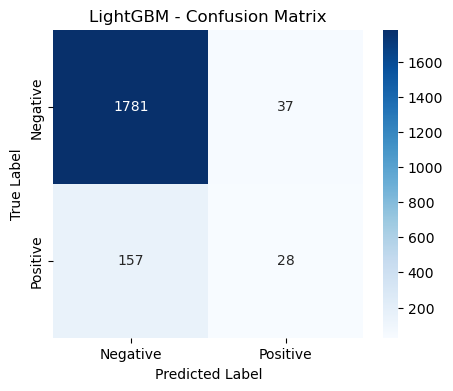


Balanced RF Results
ROC-AUC: 0.808 | Accuracy: 0.898
Training Time: 26.2s | Predicting Time: 0.000064s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.38      0.17      0.23       185

    accuracy                           0.90      2003
   macro avg       0.65      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



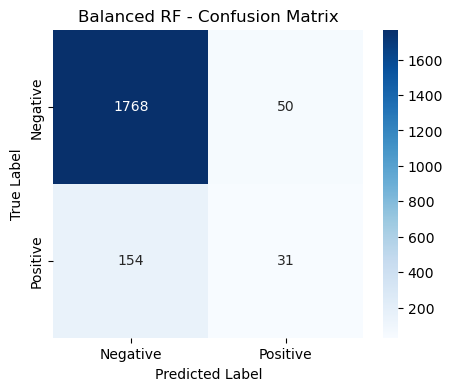


XGBoost Results
ROC-AUC: 0.807 | Accuracy: 0.896
Training Time: 2.1s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1818
         1.0       0.36      0.16      0.22       185

    accuracy                           0.90      2003
   macro avg       0.64      0.57      0.58      2003
weighted avg       0.87      0.90      0.88      2003



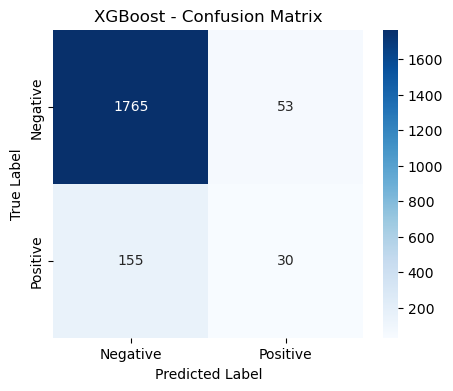


CatBoost Results
ROC-AUC: 0.813 | Accuracy: 0.889
Training Time: 3.0s | Predicting Time: 0.000004s
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1818
         1.0       0.35      0.23      0.27       185

    accuracy                           0.89      2003
   macro avg       0.64      0.59      0.61      2003
weighted avg       0.87      0.89      0.88      2003



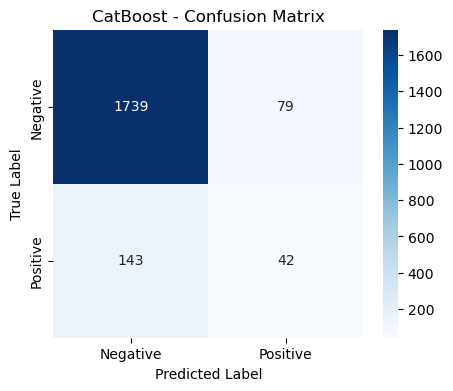


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.825 | Accuracy: 0.901
Precision: 0.873 | Recall: 0.901 | F1-score: 0.881
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.41      0.17      0.24       185

    accuracy                           0.90      2003
   macro avg       0.66      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
         LightGBM 0.827833  0.903145   0.873896 0.903145  0.881447    2.504990      0.000019
Weighted Ensemble 0.824648  0.900649   0.872777 0.900649  0.881349    0.001010      0.000001
         CatBoost 0.812663  0.889166   0.870733 0.889166  0.878534    3.034236      0.000004
      Balanced RF 0.808040  0.898153   0.8702

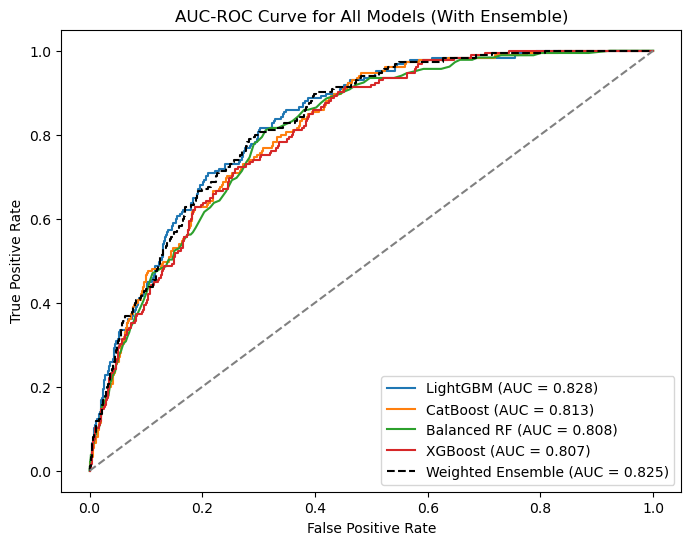

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 0           LightGBM  0.827833  0.903145    2.504990      0.000019   0.873896   
 4  Weighted Ensemble  0.824648  0.900649    0.001010      0.000001   0.872777   
 3           CatBoost  0.812663  0.889166    3.034236      0.000004   0.870733   
 1        Balanced RF  0.808040  0.898153   26.235489      0.000064   0.870262   
 2            XGBoost  0.806859  0.896156    2.060646      0.000006   0.867749   
 
      recall  f1-score  support  
 0  0.903145  0.881447   2003.0  
 4  0.900649  0.881349      NaN  
 3  0.889166  0.878534   2003.0  
 1  0.898153  0.879659   2003.0  
 2  0.896156  0.877811   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'Balanced RF': BalancedRandomForestClassifier(n_estimators=200, random_state=42),
  'XGBoost': XGBClassifier(base_score=None

In [130]:
classify.run_classification2(best_features_credit[0][:75], "DQ_TARGET", all_features)
# 75 is good

In [109]:
from joblib import load
model = load(f"LightGBM.joblib")
X = all_features[best_features_credit[0][:75]]
X = classify.preprocess(X)
scaler = load("scaler.joblib")
X = scaler.transform(X)
probabilities = model.predict_proba(X)[:, 1]
probabilities = np.round(1 + probabilities * (999 - 1)).astype(int)
probabilities = np.round(1 + (999 - probabilities)).astype(int)

/var/folders/n8/30stc5l5097b4djxnf_xh5yh0000gn/T/ipykernel_8940/2865920348.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = feat.groupby(["credit_bin", "prob_bin"])["DQ_TARGET"].mean().unstack().fillna(1.00)


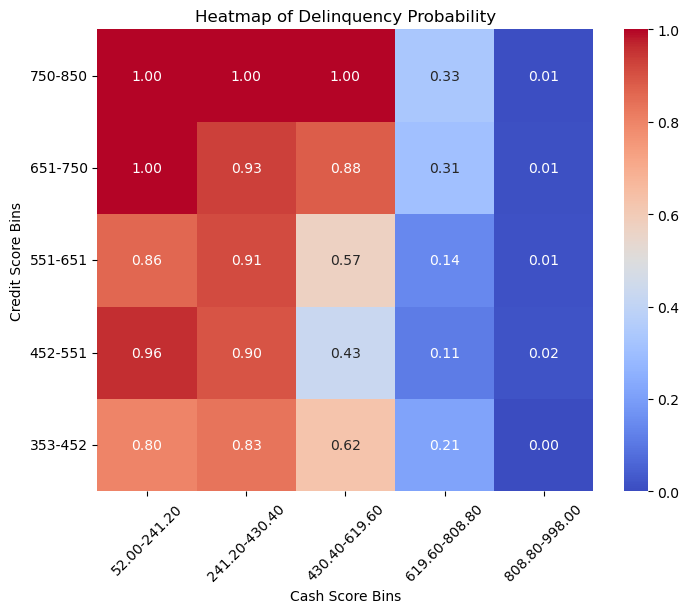

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

feat = all_features.copy()
feat = feat[['credit_score', 'DQ_TARGET']]
feat = pd.concat([feat, pd.Series(probabilities, index = all_features.index, name = 'probability')], axis = 1)

credit_bins = np.linspace(feat["credit_score"].min(), feat["credit_score"].max(), 6)
prob_bins = np.linspace(feat["probability"].min(), feat["probability"].max(), 6)

feat["credit_bin"] = pd.cut(
    feat["credit_score"],
    bins=credit_bins,
    labels=[f"{int(l)}-{int(u)}" for l, u in zip(credit_bins[:-1], credit_bins[1:])],
    include_lowest=True,
)
feat["prob_bin"] = pd.cut(
    feat["probability"],
    bins=prob_bins,
    labels=[f"{l:.2f}-{u:.2f}" for l, u in zip(prob_bins[:-1], prob_bins[1:])],
    include_lowest=True,
)

# Compute mean DQ_TARGET for each bin combination
heatmap_data = feat.groupby(["credit_bin", "prob_bin"])["DQ_TARGET"].mean().unstack().fillna(1.00)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.iloc[::-1], cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Cash Score Bins")
plt.ylabel("Credit Score Bins")
plt.title("Heatmap of Delinquency Probability")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [111]:
len(probabilities)

10014


LightGBM Results
ROC-AUC: 0.812 | Accuracy: 0.906
Training Time: 3.9s | Predicting Time: 0.000020s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.46      0.14      0.22       185

    accuracy                           0.91      2003
   macro avg       0.69      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



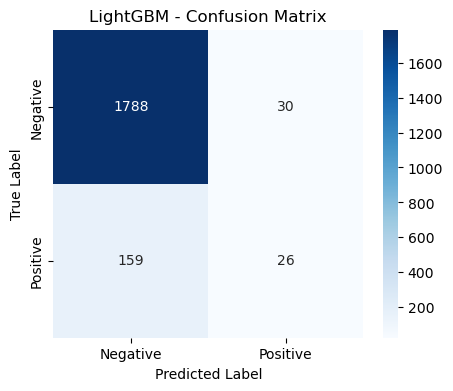


XGBoost Results
ROC-AUC: 0.806 | Accuracy: 0.907
Training Time: 3.3s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.49      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.71      0.57      0.59      2003
weighted avg       0.88      0.91      0.88      2003



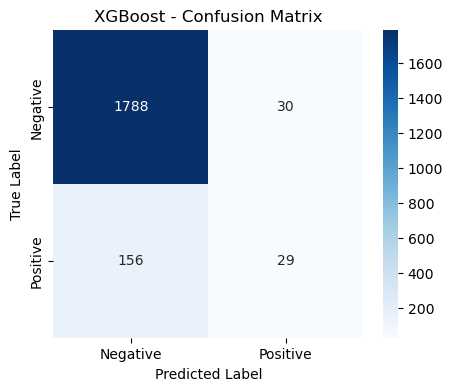


CatBoost Results
ROC-AUC: 0.814 | Accuracy: 0.898
Training Time: 5.0s | Predicting Time: 0.000011s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.39      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



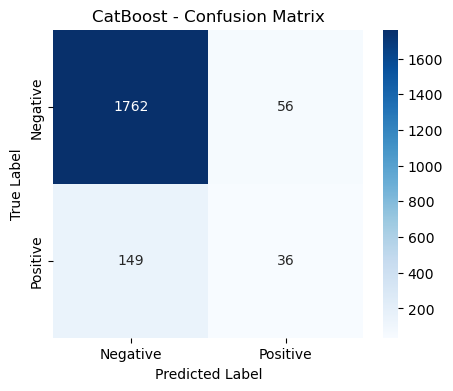


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.817 | Accuracy: 0.910
Precision: 0.886 | Recall: 0.910 | F1-score: 0.887
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.55      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.73      0.57      0.60      2003
weighted avg       0.89      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.816835  0.910135   0.885565 0.910135  0.886788    0.001061      0.000003
         CatBoost 0.813737  0.897654   0.873012 0.897654  0.881749    5.030142      0.000011
         LightGBM 0.811599  0.905642   0.876399 0.905642  0.882004    3.894122      0.000020
          XGBoost 0.805920  0.907139   0.8802

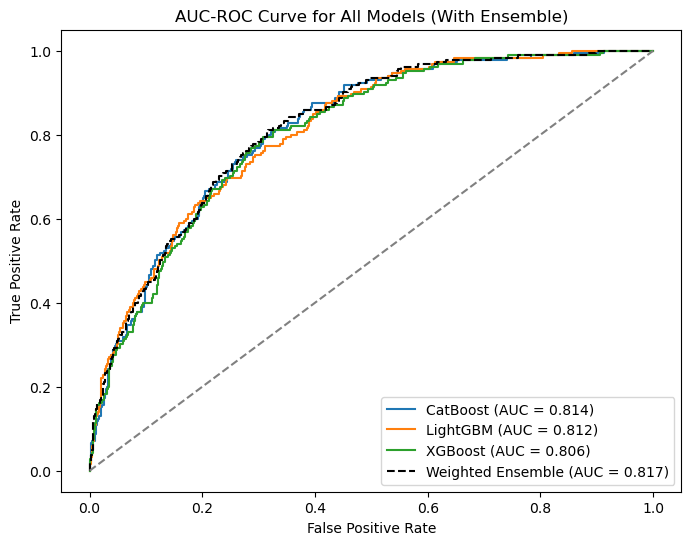

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.816835  0.910135    0.001061      0.000003   0.885565   
 2           CatBoost  0.813737  0.897654    5.030142      0.000011   0.873012   
 0           LightGBM  0.811599  0.905642    3.894122      0.000020   0.876399   
 1            XGBoost  0.805920  0.907139    3.314299      0.000006   0.880201   
 
      recall  f1-score  support  
 3  0.910135  0.886788      NaN  
 2  0.897654  0.881749   2003.0  
 0  0.905642  0.882004   2003.0  
 1  0.907139  0.884718   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [16]:
classify.run_classification2(best_features[1][:175], "DQ_TARGET", all_features)


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.904
Training Time: 3.5s | Predicting Time: 0.000021s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.12      0.19       185

    accuracy                           0.90      2003
   macro avg       0.67      0.55      0.57      2003
weighted avg       0.87      0.90      0.88      2003



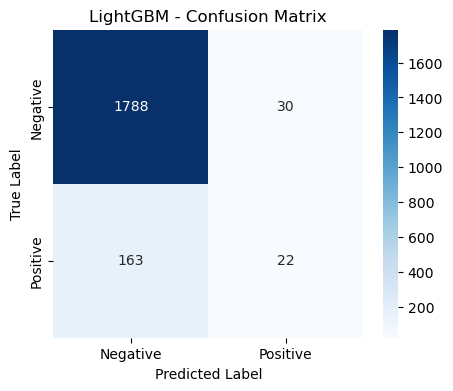


XGBoost Results
ROC-AUC: 0.812 | Accuracy: 0.905
Training Time: 3.6s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.45      0.16      0.24       185

    accuracy                           0.90      2003
   macro avg       0.69      0.57      0.59      2003
weighted avg       0.88      0.90      0.88      2003



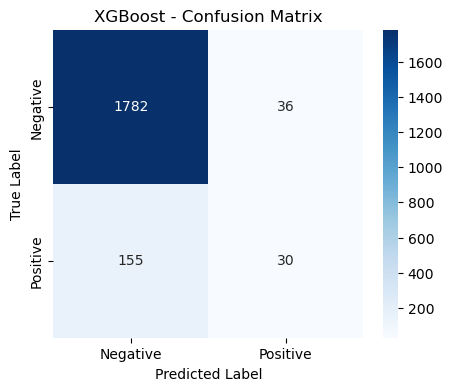


CatBoost Results
ROC-AUC: 0.821 | Accuracy: 0.896
Training Time: 5.1s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1818
         1.0       0.37      0.18      0.25       185

    accuracy                           0.90      2003
   macro avg       0.65      0.58      0.59      2003
weighted avg       0.87      0.90      0.88      2003



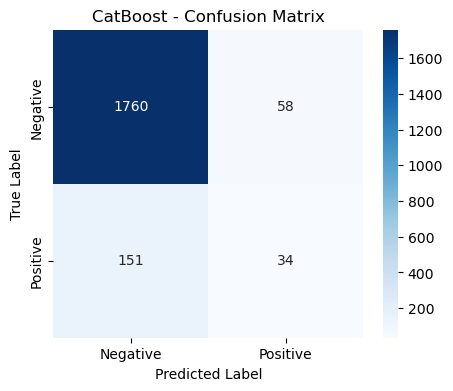


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.824 | Accuracy: 0.906
Precision: 0.877 | Recall: 0.906 | F1-score: 0.882
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.47      0.14      0.22       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.823840  0.906141   0.877217 0.906141  0.882341    0.000745      0.000002
         CatBoost 0.820968  0.895657   0.870054 0.895657  0.879442    5.102525      0.000008
         LightGBM 0.820483  0.903645   0.870884 0.903645  0.878308    3.458139      0.000021
          XGBoost 0.812422  0.904643   0.8769

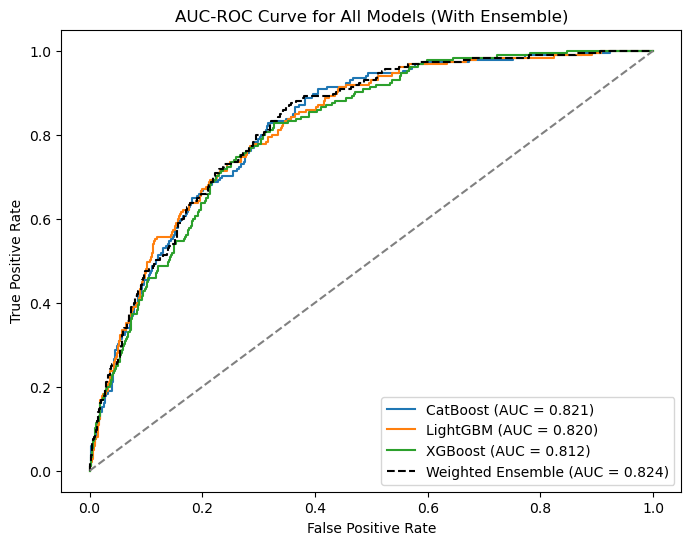

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.823840  0.906141    0.000745      0.000002   0.877217   
 2           CatBoost  0.820968  0.895657    5.102525      0.000008   0.870054   
 0           LightGBM  0.820483  0.903645    3.458139      0.000021   0.870884   
 1            XGBoost  0.812422  0.904643    3.561269      0.000009   0.876991   
 
      recall  f1-score  support  
 3  0.906141  0.882341      NaN  
 2  0.895657  0.879442   2003.0  
 0  0.903645  0.878308   2003.0  
 1  0.904643  0.883549   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [20]:
classify.run_classification2(best_features[2][:200], "DQ_TARGET", all_features)

In [20]:
categories, consumer, acct, transactions = features.get_datasets()
consumer = consumer[consumer['DQ_TARGET'].isna()]
transactions = transactions[transactions['prism_consumer_id'].isin(consumer['prism_consumer_id'])]
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer, how = 'normal')
all_features = features.get_total_transactions(all_features, transaction_categories)
na_features = features.get_categorical_features(
    all_features, transaction_categories, acct
)
na_features = na_features.set_index('prism_consumer_id')

In [21]:
above_one_tranaction = na_features[na_features['transactions'] > 1]

/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:941: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pl.yticks(range(len(feature_order)), [feature_names[i] for i in feature_order], fontsize=13)


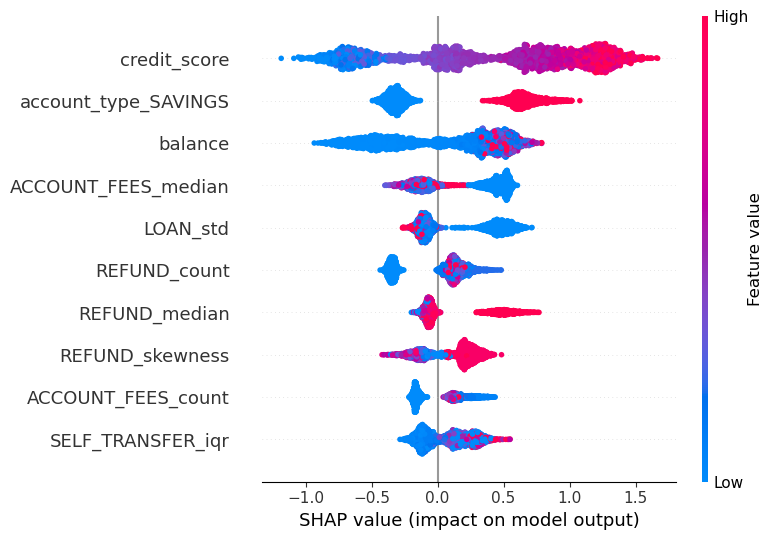

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  # Plot
/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (max_shap_feature_per_user, top_3_values)


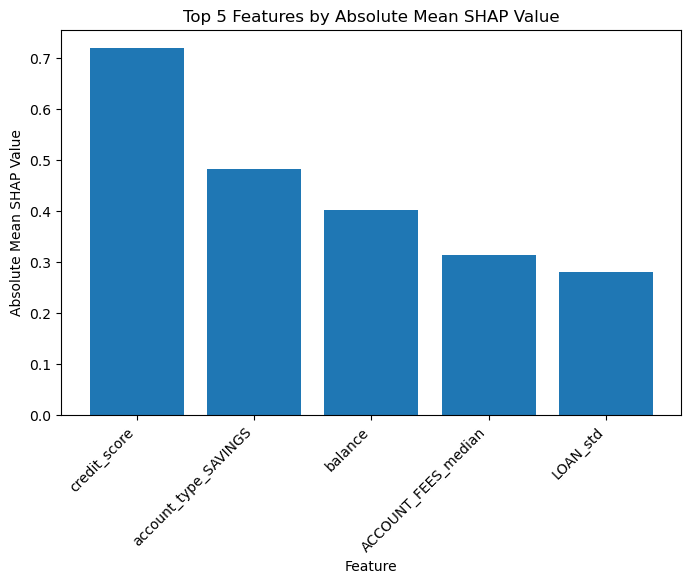

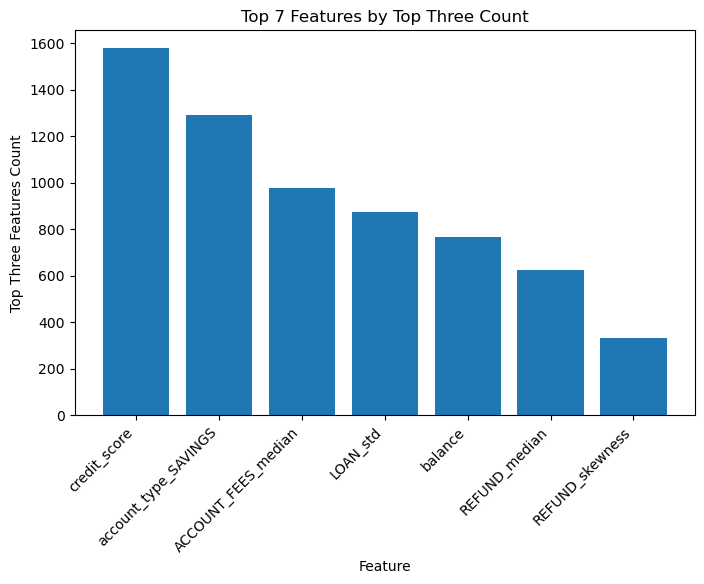

In [71]:
credit_score_info = classify.individual_test(best_features[0][:100], "WeightedEnsemble", "XGBoost", above_one_tranaction)

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


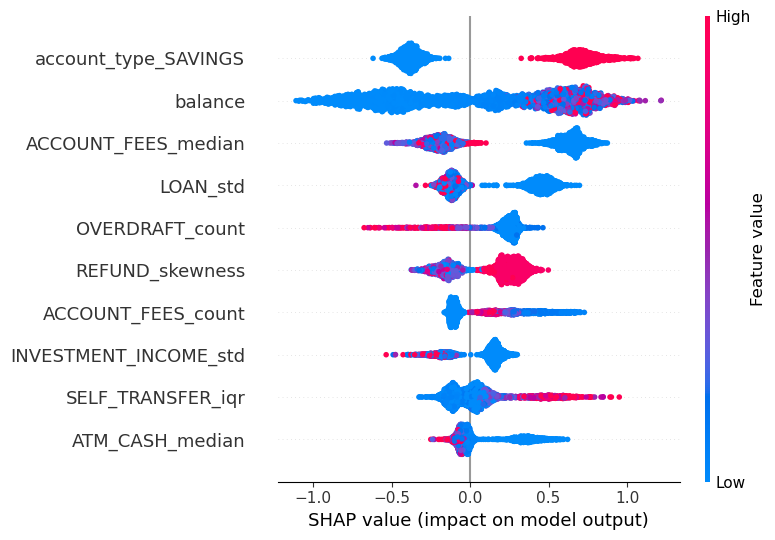

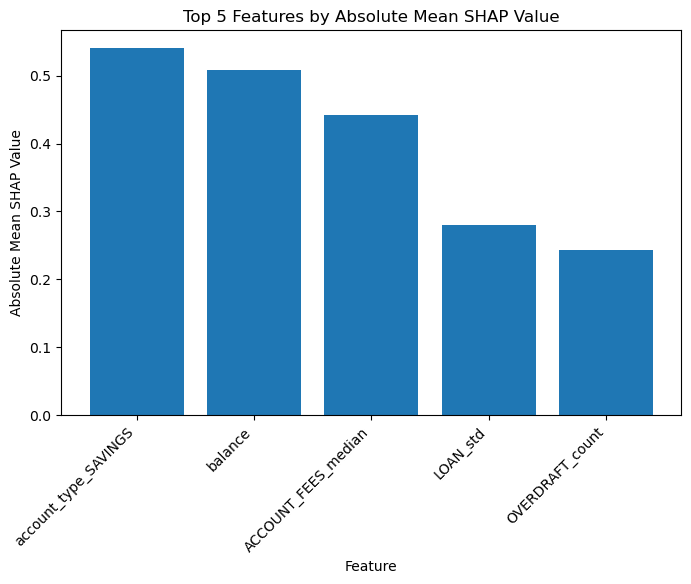

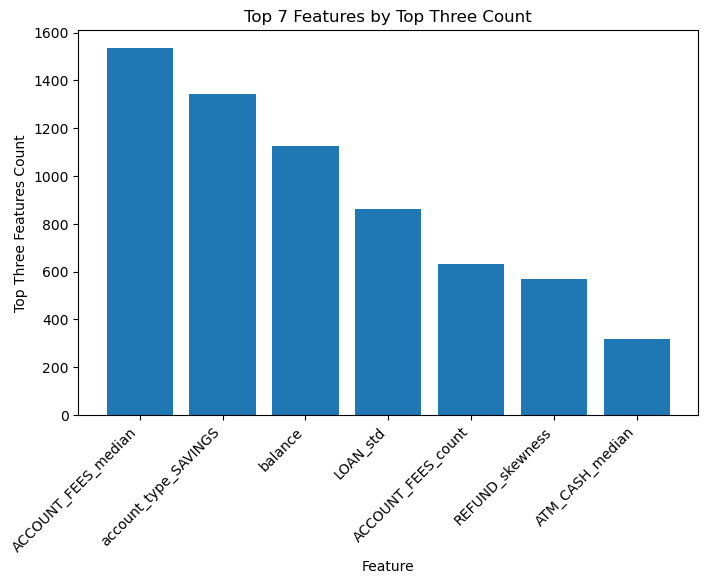

In [87]:
non_credit_score_info = classify.individual_test(all_features.columns.drop(['credit_score', 'DQ_TARGET', 'evaluation_date']), "LightGBM", "LightGBM", above_one_tranaction)

In [92]:
csi = credit_score_info.reset_index("prism_consumer_id")
csi["prism_consumer_id"] = csi["prism_consumer_id"].astype(int)
csi = csi.merge(
    na_consumers, left_on="prism_consumer_id", right_on="prism_consumer_id", how="outer"
).sort_values(by = 'prism_consumer_id', ascending = True)
csi = csi[['prism_consumer_id', 'probability', 'top_1_feature', 'top_2_feature', 'top_3_feature']]
csi = csi.rename(columns = {'probability': 'credit_score_model_prob', 'top_1_feature': 'credit_top_1_feature', 'top_2_feature': 'credit_top_2_feature', 'top_3_feature': 'credit_top_3_feature'})
csi

,prism_consumer_id,credit_score_model_prob,credit_top_1_feature,credit_top_2_feature,credit_top_3_feature
0,4000,992.0,credit_score,account_type_SAVINGS,ACCOUNT_FEES_median
1,4001,966.0,account_type_SAVINGS,LOAN_std,ACCOUNT_FEES_median
2,4002,990.0,credit_score,account_type_SAVINGS,ACCOUNT_FEES_median
3,4003,956.0,credit_score,account_type_SAVINGS,LOAN_std
4,4004,997.0,credit_score,ACCOUNT_FEES_median,LOAN_std
...,...,...,...,...,...
2844,14995,733.0,ACCOUNT_FEES_median,REFUND_skewness,credit_score
2845,14996,939.0,account_type_SAVINGS,balance,LOAN_std
2846,14997,848.0,credit_score,REFUND_median,ACCOUNT_FEES_median
2847,14998,745.0,credit_score,OVERDRAFT_median,LOAN_median


In [93]:
ncsi = non_credit_score_info.reset_index('prism_consumer_id')
ncsi['prism_consumer_id'] = ncsi['prism_consumer_id'].astype(int)
ncsi = ncsi.merge(
    na_consumers, left_on="prism_consumer_id", right_on="prism_consumer_id", how="outer"
).sort_values(by = 'prism_consumer_id', ascending = True)
ncsi = ncsi[['prism_consumer_id', 'probability', 'top_1_feature', 'top_2_feature', 'top_3_feature']]
ncsi = ncsi.rename(columns = {'probability': 'non_credit_score_model_prob', 'top_1_feature': 'non_credit_top_1_feature', 'top_2_feature': 'non_credit_top_2_feature', 'top_3_feature': 'non_credit_top_3_feature'})
ncsi

,prism_consumer_id,non_credit_score_model_prob,non_credit_top_1_feature,non_credit_top_2_feature,non_credit_top_3_feature
0,4000,995.0,ACCOUNT_FEES_median,balance,account_type_SAVINGS
1,4001,968.0,account_type_SAVINGS,ACCOUNT_FEES_median,LOAN_std
2,4002,995.0,balance,ACCOUNT_FEES_median,account_type_SAVINGS
3,4003,973.0,account_type_SAVINGS,ACCOUNT_FEES_median,LOAN_std
4,4004,993.0,ACCOUNT_FEES_median,account_type_SAVINGS,SELF_TRANSFER_iqr
...,...,...,...,...,...
2844,14995,753.0,ACCOUNT_FEES_median,REFUND_skewness,LOAN_median
2845,14996,967.0,account_type_SAVINGS,balance,LOAN_std
2846,14997,836.0,ACCOUNT_FEES_median,REFUND_skewness,OVERDRAFT_count
2847,14998,797.0,GENERAL_MERCHANDISE_skewness,GENERAL_MERCHANDISE_count,OVERDRAFT_median


In [96]:
final_results = pd.merge(csi, ncsi, on = 'prism_consumer_id')
final_results

,prism_consumer_id,credit_score_model_prob,credit_top_1_feature,credit_top_2_feature,credit_top_3_feature,non_credit_score_model_prob,non_credit_top_1_feature,non_credit_top_2_feature,non_credit_top_3_feature
0,4000,992.0,credit_score,account_type_SAVINGS,ACCOUNT_FEES_median,995.0,ACCOUNT_FEES_median,balance,account_type_SAVINGS
1,4001,966.0,account_type_SAVINGS,LOAN_std,ACCOUNT_FEES_median,968.0,account_type_SAVINGS,ACCOUNT_FEES_median,LOAN_std
2,4002,990.0,credit_score,account_type_SAVINGS,ACCOUNT_FEES_median,995.0,balance,ACCOUNT_FEES_median,account_type_SAVINGS
3,4003,956.0,credit_score,account_type_SAVINGS,LOAN_std,973.0,account_type_SAVINGS,ACCOUNT_FEES_median,LOAN_std
4,4004,997.0,credit_score,ACCOUNT_FEES_median,LOAN_std,993.0,ACCOUNT_FEES_median,account_type_SAVINGS,SELF_TRANSFER_iqr
...,...,...,...,...,...,...,...,...,...
2995,14995,733.0,ACCOUNT_FEES_median,REFUND_skewness,credit_score,753.0,ACCOUNT_FEES_median,REFUND_skewness,LOAN_median
2996,14996,939.0,account_type_SAVINGS,balance,LOAN_std,967.0,account_type_SAVINGS,balance,LOAN_std
2997,14997,848.0,credit_score,REFUND_median,ACCOUNT_FEES_median,836.0,ACCOUNT_FEES_median,REFUND_skewness,OVERDRAFT_count
2998,14998,745.0,credit_score,OVERDRAFT_median,LOAN_median,797.0,GENERAL_MERCHANDISE_skewness,GENERAL_MERCHANDISE_count,OVERDRAFT_median


In [97]:
final_preds = final_results.reset_index()
final_preds.to_csv('../../data_q2/ucsd-consDF.csv', index = False)

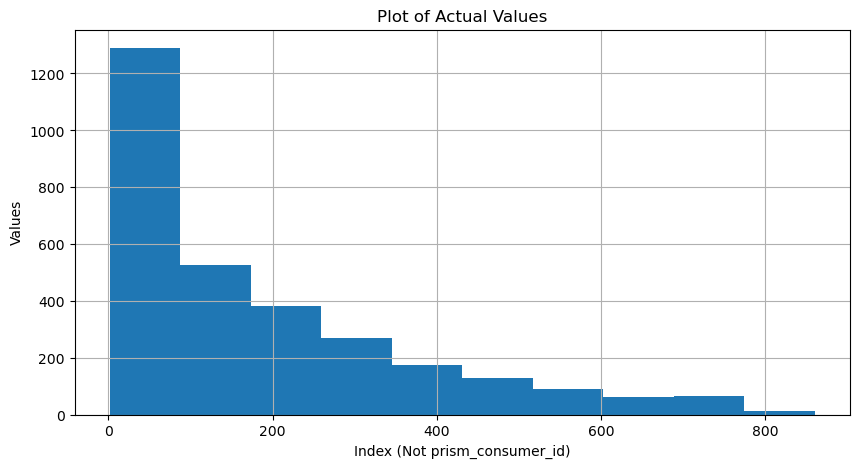

In [470]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(list(info['probability']))

# Labels and title
plt.xlabel("Index (Not prism_consumer_id)")
plt.ylabel("Values")
plt.title("Plot of Actual Values")
plt.grid(True)

In [205]:
info[info['probability'] < 500].shape[0]

2484

In [333]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score
prism_consumer_id,,,,,,,
4000,5,ATM_CASH_count,0.197096,ESSENTIAL_SERVICES_count,0.152379,ACCOUNT_FEES_count,0.140193
4001,30,LOAN_count,0.161585,REFUND_mean,0.129386,ACCOUNT_FEES_count,0.117561
4002,5,REFUND_skewness,0.161330,ESSENTIAL_SERVICES_count,0.148610,ACCOUNT_FEES_count,0.121736
4003,36,BANKING_CATCH_ALL_coef_variation,0.265769,ATM_CASH_count,0.206496,ESSENTIAL_SERVICES_count,0.164008
4004,3,ATM_CASH_count,0.206104,LOAN_count,0.145255,ACCOUNT_FEES_count,0.121508
...,...,...,...,...,...,...,...
14995,230,balance,0.474529,account_type_SAVINGS,0.424305,BNPL_mean,0.173496
14996,26,INVESTMENT_INCOME_std,0.285441,BANKING_CATCH_ALL_coef_variation,0.222544,ACCOUNT_FEES_median,0.222124
14997,82,balance,0.482480,account_type_SAVINGS,0.325705,ESSENTIAL_SERVICES_count,0.167627
